### Laplace Transforms and Sympy

Laplace transforms convert a function $f(t)$ in the time domain into function in the Laplace domain $F(s)$.

$F(s) = \mathcal{L}\left(f(t)\right) = \int_0^\infty f(t)e^{-s\,t}dt$

As an example of the Laplace transform, consider a constant $c$. The function $f(t) = c$ and the following expression is integrated. 

$\mathcal{L}(c)=\int_0^\infty c \, e^{-s\,t} dt = -\frac{c}{s}e^{-s\,t} \biggr\rvert_0^\infty = 0 - \left(-\frac{c}{s} \right) = \frac{c}{s}$

Mathematicians have developed tables of commonly used Laplace transforms. <a href='https://apmonitor.com/pdc/index.php/Main/LaplaceTransforms'>Here</a> is summary table with a few of the entries that will be most common for analysis of linear differential equations in the <a href='https://apmonitor.com/pdc/'>Process Dynamics and Control course</a>. Notice that the derived value for a constant $c$ is the unit step function with $c=1$ where a signal output changes from 0 to 1 at $time=0$.

In [1]:
import sympy as sym
from sympy.abc import s,t,x,y,z
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform

In [2]:
# Laplace transform (t->s)
U = laplace_transform(5*t, t, s)
U[0]

5/s**2

In [3]:
# Inverse Laplace transform (s->t)
inverse_laplace_transform(U[0],s,t)

5*t*Heaviside(t)

In [4]:
# Function
F = 5*(s+1)/(s+3)**2
F

(5*s + 5)/(s + 3)**2

In [5]:
# Partial fraction decomposition
sym.apart(F)

5/(s + 3) - 10/(s + 3)**2

In [6]:
# denominator of transfer function
d1 = (s+1)*(s+3)*(s**2+3*s+1)
d1

(s + 1)*(s + 3)*(s**2 + 3*s + 1)

In [7]:
# expand polynomial
d2=sym.expand(d1)
d2

s**4 + 7*s**3 + 16*s**2 + 13*s + 3

In [8]:
# find roots
sym.roots(d2)

{-1: 1, -3: 1, -3/2 - sqrt(5)/2: 1, -3/2 + sqrt(5)/2: 1}

### Example Solution

Python SymPy computes symbolic solutions to many mathematical problems including Laplace transforms. A symbolic and numeric solution is created with the <a href='https://apmonitor.com/pdc/index.php/Main/TransferFunctions'>following example problem</a>.

Compute the analytic and numeric system response to an input that includes a step and ramp function.

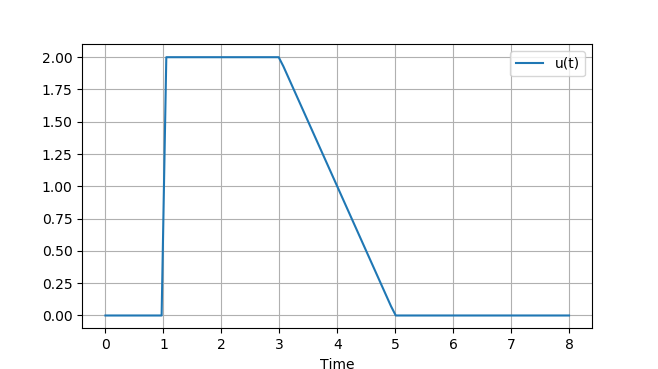

The system transfer function is a stable system with two poles (denominator roots) and one zero (numerator root):

$G(s)=\frac{5\left(s + 1\right)}{\left(s + 3\right)^2}$

Create the step and ramp signals as three individual functions. Compute the system response to each of those three inputs and then sum the signals.

**Symbolic Solution (Python Sympy)**

y1
-10*(-exp(3*t) + 6*exp(3)*log(exp(-t)) + 7*exp(3))*exp(-3*t)*Heaviside(t - 1)/9


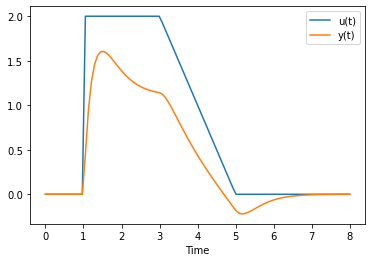

In [9]:
import sympy as sym
from sympy.abc import s,t,x,y,z
import numpy as np
from sympy.integrals import inverse_laplace_transform
import matplotlib.pyplot as plt

# Define inputs
# First step (up) starts at 1 sec
U1 = 2/s*sym.exp(-s)
# Ramp (down) starts at 3 sec
U2 = -1/s**2*sym.exp(-3*s)
# Ramp completes at 5 sec
U3 = 1/s**2*sym.exp(-5*s)

# Transfer function
G = 5*(s+1)/(s+3)**2

# Calculate responses
Y1 = G * U1
Y2 = G * U2
Y3 = G * U3

# Inverse Laplace Transform
u1 = inverse_laplace_transform(U1,s,t)
u2 = inverse_laplace_transform(U2,s,t)
u3 = inverse_laplace_transform(U3,s,t)
y1 = inverse_laplace_transform(Y1,s,t)
y2 = inverse_laplace_transform(Y2,s,t)
y3 = inverse_laplace_transform(Y3,s,t)
print('y1')
print(y1)

# generate data for plot
tm = np.linspace(0,8,100)
us = np.zeros(len(tm))
ys = np.zeros(len(tm))

# substitute numeric values for u and y
for u in [u1,u2,u3]:
    for i in range(len(tm)):
        us[i] += u.subs(t,tm[i])
for y in [y1,y2,y3]:
    for i in range(len(tm)):
        ys[i] += y.subs(t,tm[i])

# plot results
plt.figure()
plt.plot(tm,us,label='u(t)')
plt.plot(tm,ys,label='y(t)')
plt.legend()
plt.xlabel('Time')
plt.show()

**Numeric Solution (Python Gekko)**

An alternative to a symbolic solution is to numerically compute the response in the time domain. The transfer function must first be translated into a differential equation.

$G(s)=\frac{Y(s)}{U(s)}=\frac{5\left(s + 1\right)}{\left(s + 3\right)^2}$

$Y(s)\left(s + 3\right)^2=5\left(s + 1\right)U(s)$

$Y(s)\left(s^2 +6s+9\right)=\left(5s + 5\right)U(s)$

$\frac{dy^2(t)}{dt^2}+6\frac{dy(t)}{dt}+9y(t)=5\frac{du(t)}{dt}+5u(t)$

There is additional information on solving differential equations with <a href='https://apmonitor.com/pdc/index.php/Main/PythonDifferentialEquations'>Python GEKKO</a> or with <a href='https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations'>Python Scipy ODEINT</a>. The same solution is found with a analytic or numeric approach. The advantage of an symbolic (analytic) solution is that it is highly accurate and does not rely on numerical methods to approximate the solution. Also, the solution is in a compact form that can be used for further analysis. Symbolic solutions are limited to cases where the input function and system transfer function can be expressed in Laplace form. This may not be the case for inputs that come from data sources where there the input function has random variation. A symbolic solution with Laplace transforms is also not possible for systems that are nonlinear or complex while numeric solvers can handle many thousands or millions of equations with nonlinear relationships. The disadvantage of a numeric solution is that it is an approximation of the true solution with possible inaccuracies. Another disadvantage is that solvers may fail to converge although this is not typical on problems with an analytic solution.

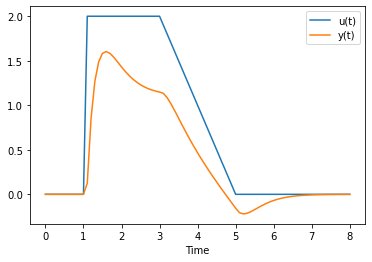

In [10]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

# Create GEKKO model
m = GEKKO(remote=False)

# Time points for simulation
nt = 81
m.time = np.linspace(0,8,nt)

# Define input
# First step (up) starts at 1 sec
# Ramp (down) starts at 3 sec
# Ramp completes at 5 sec
ut = np.zeros(nt)
ut[11:31] = 2.0
for i in range(31,51):
    ut[i] = ut[i-1] - 0.1

# Define model
u = m.Param(value=ut)
ud = m.Var()
y = m.Var()
dydt = m.Var()
m.Equation(ud==u)
m.Equation(dydt==y.dt())
m.Equation(dydt.dt() + 6*y.dt() + 9*y==5*ud.dt()+5*u)

# Simulation options
m.options.IMODE=7
m.options.NODES=4
m.solve(disp=False)

# plot results
plt.figure()
plt.plot(m.time,u.value,label='u(t)')
plt.plot(m.time,y.value,label='y(t)')
plt.legend()
plt.xlabel('Time')
plt.show()